<a href="https://colab.research.google.com/github/KangHyeonGu1/seminar-project/blob/master/solar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.formula.api import ols
import scipy.stats as stats
import matplotlib.pyplot as plt
data = pd.read_csv("solar.txt")
data.head
data=data.rename(columns={'cloud cover':'sky_cover'})


In [49]:
rm = ols(' day_power~ temp + sky_cover + temp*sky_cover + humidity', data=data).fit()
rm.summary()
rm.params

Intercept         0.660823
temp              0.358470
sky_cover        -0.011836
temp:sky_cover    0.033936
humidity         -0.836903
dtype: float64

In [3]:
rm = ols(' humidity~ temp', data=data).fit()
rm.summary()
rm.params

Intercept    0.833282
temp        -0.429135
dtype: float64

In [91]:
rm = ols(' day_power~ temp', data=data).fit()
rm.summary()
rm.params

Intercept   -0.082303
temp         0.851459
dtype: float64

In [14]:
# 독립변수 기온 spread설정과 삼각퍼지화
te=data['temp']
spreadx= [None] * 1332
for i in range(0,1331):
  spreadx[i]= (np.abs(te[i+1]-te[i]))/2
spreadx[1331]=spreadx[1330]
x1= te-spreadx
x2= te+spreadx
xdf=pd.DataFrame({'a':x1,'b':te,'c':x2})
xa=xdf[xdf['a']< 0]
xdf.loc[xa.index,'a']=0
x=xdf.to_numpy()

In [5]:
hu=data['humidity']
spreadm= [None] * 1332
for i in range(0,1331):
  spreadm[i]= (np.abs(hu[i+1]-hu[i]))/2
spreadm[1331]=spreadm[1330]
m1= hu-spreadm
m2= hu+spreadm
mdf=pd.DataFrame({'a':m1,'b':hu,'c':m2})
ma=mdf[mdf['a']< 0]
mdf.loc[ma.index,'a']=0
m=mdf.to_numpy()

In [6]:
# 종속변수
power=data['day_power']
ydf=pd.DataFrame({'a':power,'b':power,'c':power})
y= ydf.to_numpy()


In [7]:
# 조절변수
cl=data['sky_cover']
w1= cl-1
w2= cl+1
wdf=pd.DataFrame({'a':w1,'b':cl,'c':w2})
wa=wdf[wdf['a']< 1]
wdf.loc[wa.index,'a']=1
wc=wdf[wdf['c']> 8]
wdf.loc[wc.index,'c']=8
w=wdf.to_numpy()

In [8]:
ones=np.ones(shape=(1332,3))
def dc(a,b):          
  c=a*b
  sum=c.sum()
  return sum

In [16]:
spreadx[0]

0.028943421949556902

In [31]:
def freg(data):
 te=data['temp']
 spread= [None] * 1332
 for i in range(0,1332):
    spread[i]= spreadx[te.index[i]]
 x1= te-spread
 x2= te+spread
 xdf=pd.DataFrame({'a':x1,'b':te,'c':x2})
 xa=xdf[xdf['a']< 0]
 xdf.loc[xa.index,'a']=0
 x=xdf.to_numpy()

 hu=data['humidity']
 spreadm2= [None] * 1332
 for i in range(0,1332):
  spreadm2[i]= spreadm[hu.index[i]]
 m1= hu-spreadm2
 m2= hu+spreadm2
 mdf=pd.DataFrame({'a':m1,'b':hu,'c':m2})
 ma=mdf[mdf['a']< 0]
 mdf.loc[ma.index,'a']=0
 m=mdf.to_numpy()

 power=data['day_power']
 ydf=pd.DataFrame({'a':power,'b':power,'c':power})
 y= ydf.to_numpy()

 cl=data['sky_cover']
 w1= cl-1
 w2= cl+1
 wdf=pd.DataFrame({'a':w1,'b':cl,'c':w2})
 wa=wdf[wdf['a']< 1]
 wdf.loc[wa.index,'a']=1
 wc=wdf[wdf['c']> 8]
 wdf.loc[wc.index,'c']=8
 w=wdf.to_numpy()
 xw=x*w
 xtx=np.zeros(shape=(2,2))
 xlist=[ones,x]
 for i in range(0,2):   
    for j in range(0,2):
      xtx[i,j]= dc(xlist[i],xlist[j])
 xtm=np.zeros(shape=(2,1))   
 for i in range(0,2):   
    for j in range(0,1):
      xtm[i,j]= dc(xlist[i],m)
 lxtx=np.linalg.inv(xtx)
 b=lxtx@xtm
 b=np.around(b, decimals=4)

 xtx2=np.zeros(shape=(5,5))
 xlist2=[ones,x,w,xw,m]
 for i in range(0,5):   
    for j in range(0,5):
      xtx2[i,j]= dc(xlist2[i],xlist2[j])
 xty=np.zeros(shape=(5,1))   
 for i in range(0,5):   
    for j in range(0,1):
      xty[i,j]= dc(xlist2[i],y)
 lxtx2=np.linalg.inv(xtx2)
 b2=lxtx2@xty
 b2=np.around(b2, decimals=4)
 xtx3=np.zeros(shape=(2,2))
 xlist3=[ones,x]
 for i in range(0,2):    
    for j in range(0,2):
      xtx3[i,j]= dc(xlist3[i],xlist3[j])
 xty3=np.zeros(shape=(2,1))
 for i in range(0,2):    
    for j in range(0,1):
      xty3[i,j]= dc(xlist3[i],y)
 lxtx3=np.linalg.inv(xtx3)
 b3=lxtx3@xty3
 b3=np.around(b3, decimals=4)
 b3 
 return b, b2,b3

In [50]:
para=freg(data)
para
a=para[0][1]
b=para[1][4]
c1=para[1][1]
c2=para[1][2]
c3=para[1][3]
c=para[2][1]
para

(array([[ 0.8189],
        [-0.4   ]]), array([[ 0.5929],
        [ 0.3925],
        [-0.0067],
        [ 0.0324],
        [-0.7851]]), array([[-0.0751],
        [ 0.8369]]))

In [12]:
# sea
x_m=x.sum(axis=0)/1332
x_m
d2=(x-x_m)**2
sda=np.sqrt(d2.sum()/1331)
sea=sda/np.sqrt(1332)
sea

0.00889794270774266

In [13]:
# seb
m_m=m.sum(axis=0)/1332
m_m
d2=(m-m_m)**2
sdb=np.sqrt(d2.sum()/1331)
seb=sdb/np.sqrt(1332)
seb

0.0077108953758481605

In [14]:
# sew
w_m=w.sum(axis=0)/1332
w_m
d2=(w-w_m)**2
sdw=np.sqrt(d2.sum()/1331)
sew=sdw/np.sqrt(1332)
sew

0.06006941551329541

In [15]:
# sexw
xw=x*w
xw_m=xw.sum(axis=0)/1332
xw_m
d2=(xw-xw_m)**2
sdxw=np.sqrt(d2.sum()/1331)
sexw=sdxw/np.sqrt(1332)
sexw

0.044206519563636

In [16]:
seab=np.sqrt((a**2*seb**2)+ (b**2*sea**2) + (sea**2*seb**2) )
seab

array([0.00763669])

In [17]:
# w 계수 c2 의 95% 신뢰구간과 z값 검정
CI=[c2-1.96*sew,c2+1.96*sew]
z=c2/sew
p = 2 * (1 - stats.norm.cdf(np.abs(z)))
print(CI,p)

[array([-0.12443605]), array([0.11103605])] [0.91119003]


In [18]:
# xw 계수 c3 의 95% 신뢰구간과 z값 검정
CI=[c3-1.96*sexw,c3+1.96*sexw]
z=c3/sexw
p = 2 * (1 - stats.norm.cdf(np.abs(z)))
print(CI,p)

[array([-0.05424478]), array([0.11904478])] [0.46360505]


In [19]:
# ab 
ab=a*b
CI=[ab-1.96*seab,ab+1.96*seab]
z=ab/seab
p = 2 * (1 - stats.norm.cdf(np.abs(z)))
print(CI,p)

[array([0.29907209]), array([0.32900791])] [0.]


In [37]:
#부트스트랩 표본
a_boot=[None]*5000
c1_boot=[None]*5000
c2_boot=[None]*5000
b_boot=[None]*5000
c3_boot=[None]*5000
c_boot=[None]*5000
for i in range(0,5000):
  new_data=data.sample(n=1332,replace=True)
  parameters=freg(new_data)
  a_boot[i]= parameters[0][1]
  c1_boot[i]= parameters[1][1]
  c2_boot[i]= parameters[1][2]
  b_boot[i]= parameters[1][4]
  c3_boot[i]= parameters[1][3]
  c_boot[i]= parameters[2][1]


In [39]:
np.save('a_boot',a_boot)
np.save('b_boot',b_boot)
np.save('c_boot',c_boot)
np.save('c1_boot',c1_boot)
np.save('c2_boot',c2_boot)
np.save('c3_boot',c3_boot)

In [40]:
a_boot=np.load('a_boot.npy')
c1_boot=np.load('c1_boot.npy')
c2_boot=np.load('c2_boot.npy')
c3_boot=np.load('c3_boot.npy')
b_boot=np.load('b_boot.npy')
c_boot=np.load('c_boot.npy')
ab_boot=a_boot*b_boot

In [41]:
a_boot= a_boot.tolist()
b_boot= b_boot.tolist()
c_boot= c_boot.tolist()
c1_boot= c1_boot.tolist()
c2_boot= c2_boot.tolist()
c3_boot= c3_boot.tolist()
ab_boot= ab_boot.tolist()

In [42]:
a_boot.sort()
b_boot.sort()
c_boot.sort()
c1_boot.sort()
c2_boot.sort()
c3_boot.sort()
ab_boot.sort()
a_boot=np.array(a_boot)
b_boot=np.array(b_boot)
c_boot=np.array(c_boot)
c1_boot=np.array(c1_boot)
c2_boot=np.array(c2_boot)
c3_boot=np.array(c3_boot)
ab_boot=np.array(ab_boot)

<AxesSubplot:ylabel='Count'>

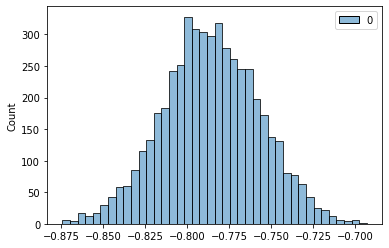

In [43]:
sns.histplot(b_boot)

Text(0, 0.5, 'Frequency')

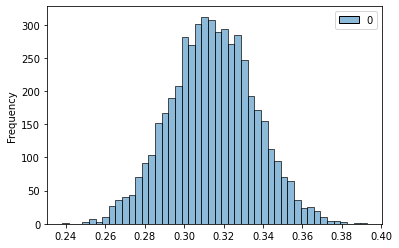

In [51]:
sns.histplot(ab_boot)
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

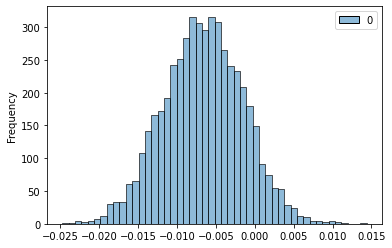

In [46]:
sns.histplot(c2_boot)
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

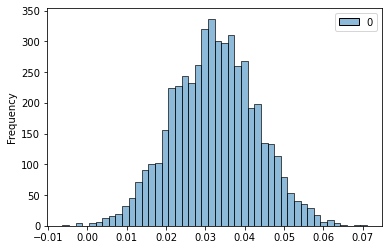

In [45]:
sns.histplot(c3_boot)
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

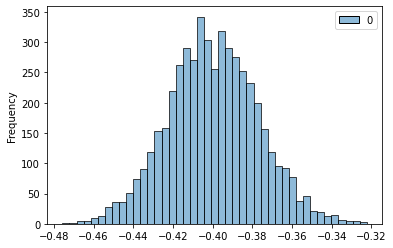

In [44]:
sns.histplot(a_boot)
plt.ylabel("Frequency")

In [77]:
# c2에 대한 부트스트랩 신뢰구간
c2l=(c2_boot[124]+ c2_boot[125])/2
c2u=(c2_boot[4873]+c2_boot[4874])/2
c2cl=[c2l,c2u]


In [37]:
# c3에 대한 부트스트랩 신뢰구간
c3l=(c3_boot[124]+ c3_boot[125])/2
c3u=(c3_boot[4873]+c3_boot[4874])/2
c3cl=[c3l,c3u]
c3cl

[array([0.0047]), array([0.03995])]

In [45]:
# ab에 대한 부트스트랩 신뢰구간
abl=(ab_boot[124]+ ab_boot[125])/2
abu=(ab_boot[4873]+ab_boot[4874])/2
abcl=[abl,abu]
abcl


[array([0.10204469]), array([0.15068076])]